In [7]:
# %load_ext autoreload
# %autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import json

from matplotlib import cm 
colors = cm.Reds(np.linspace(0.4, 0.9, 10))  # Gradient from light to dark red

import sys
sys.path.append('../')

from src.viz import (
    plot_transition_matrix,
    plot_distribution,
    plot_implied_timescales,
)

#sns.set(style="white", context="notebook")

def extract_eigen_values(dict_in):
    # Extract spectrum per tau
    spectrum_tau = dict_in["spectrum_tau"]  # keys are strings, e.g. "1", "2", ...
    # Convert tau keys to integers and sort
    tau_list = sorted(map(int, spectrum_tau.keys()))
    # Initialize list of lists: eigval_curves[i][j] = i-th eigval at j-th tau
    eigval_curves = [[] for _ in range(10)]
    for tau in tau_list:
        eigvals = spectrum_tau[str(tau)]
        for i in range(min(10, len(eigvals))):
            eigval_curves[i].append(eigvals[i])
    return eigval_curves,tau_list

In [8]:

# Load the saved JSON
with open("../data/processed/markov_summary.json", "r") as f:
    data = json.load(f)

# Load the saved JSON
with open("../data/processed/torsion_markov_summary.json", "r") as f:
    data_tors = json.load(f)

eigval_curves,tau_list = extract_eigen_values(data)
eigval_curves_tors,tau_list_tors = extract_eigen_values(data_tors)


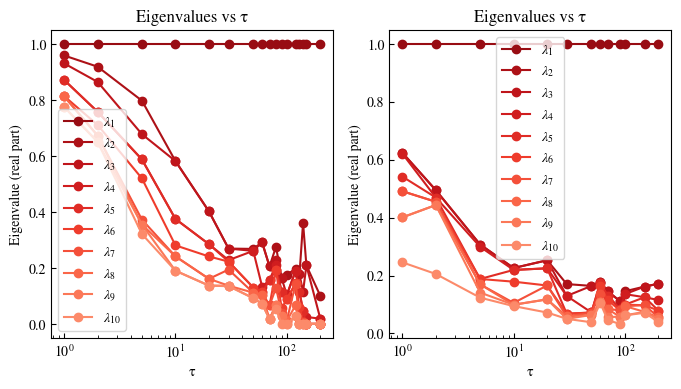

In [10]:

# Plot
fig,ax = plt.subplots(ncols=2,figsize=(8,4))
for i, eigs in enumerate(eigval_curves):
    ax[0].plot(tau_list, eigs,marker='o', label=r"$\lambda_{"+str(i+1)+"}$",color=colors[9-i])
ax[0].set_xlabel("τ")
ax[0].set_ylabel("Eigenvalue (real part)")
ax[0].set_title("Eigenvalues vs τ")
ax[0].set_xscale('log')
ax[0].legend()

for i, eigs in enumerate(eigval_curves_tors):
    ax[1].plot(tau_list_tors, eigs,marker='o', label=r"$\lambda_{"+str(i+1)+"}$",color=colors[9-i])
ax[1].set_xlabel("τ")
ax[1].set_ylabel("Eigenvalue (real part)")
ax[1].set_title("Eigenvalues vs τ")
ax[1].set_xscale('log')
ax[1].legend()

First build the markov model associated with the clustering

In [4]:
# Paths to data from embed_and_cluster.py
with open("../data/processed/embedding.pkl", "rb") as f:
        emb = pickle.load(f)

print(f"Labels shape: {emb.labels}")
print(f"Embedding shape: {emb.embedding_matrix.shape}")


Labels shape: [6 6 6 ... 6 6 6]
Embedding shape: (2190, 981, 40)


Now have a look at the stationnary distribution

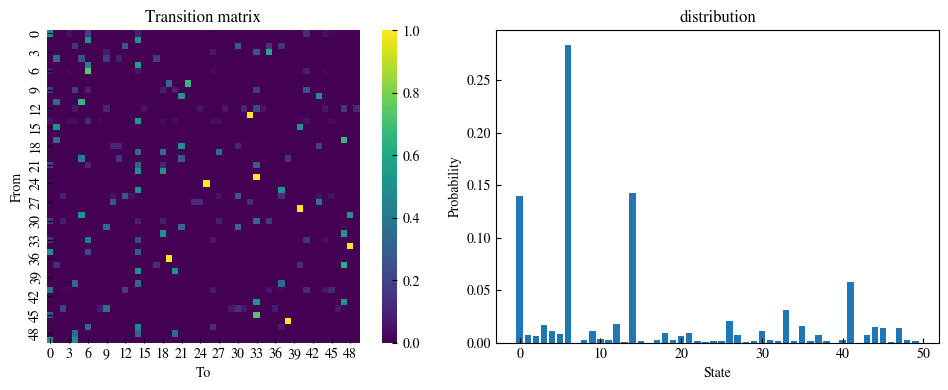

In [ ]:
emb.make_transition_matrix(tau=10)
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
plot_transition_matrix(emb.P, ax=axs[0])
plot_distribution(emb.pi, ax=axs[1])
plt.tight_layout()


In [6]:
with open("../data/processed/embedding.pkl", "wb") as f:
        pickle.dump(emb,f,protocol=pickle.HIGHEST_PROTOCOL)

In [7]:
h = emb.entropy_rate(emb.P, emb.pi)
print(f"Shannon entropy rate: {h:.4f} bits per step")


Shannon entropy rate: 1.7807 bits per step


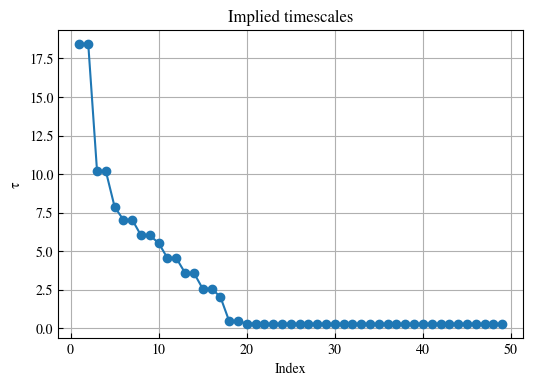

In [8]:
ts = emb.implied_timescales(emb.P, lag=emb.tau)

fig, ax = plt.subplots(figsize=(6, 4))
plot_implied_timescales(ts, ax=ax)


Look at the spectrum of the transition matrix.

[-5.97173073e-01 -5.20661982e-01 -5.04885258e-01 -5.04885258e-01
 -4.24867589e-01 -4.24867589e-01 -3.55671932e-01 -3.40284803e-01
 -3.40284803e-01 -3.07935370e-01 -3.07935370e-01 -2.53490204e-01
 -2.53490204e-01 -2.15326890e-01 -2.11851579e-01 -2.11851579e-01
 -1.74336656e-01 -1.74336656e-01 -1.55383940e-01 -1.55383940e-01
 -1.29181662e-01 -1.29181662e-01 -9.93073651e-02 -9.93073651e-02
 -9.28332768e-02 -9.28332768e-02 -6.13140020e-02 -6.13140020e-02
 -4.39771367e-02 -4.39771367e-02 -5.13297035e-03 -7.26804432e-16
 -5.74737831e-17  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

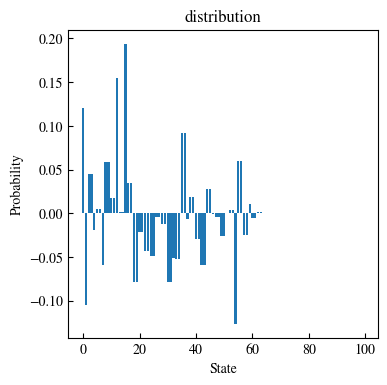

In [13]:
eig_val,eig_vec = np.linalg.eig(emb.P)
real_spectrum = np.real(eig_val)
eig_vec = eig_vec[np.argsort(real_spectrum)]
real_spectrum = real_spectrum[np.argsort(real_spectrum)]
print(real_spectrum)
fig,ax = plt.subplots(figsize=(4,4))
plot_distribution(np.real(eig_vec[-2]),ax = ax)
plt.show()

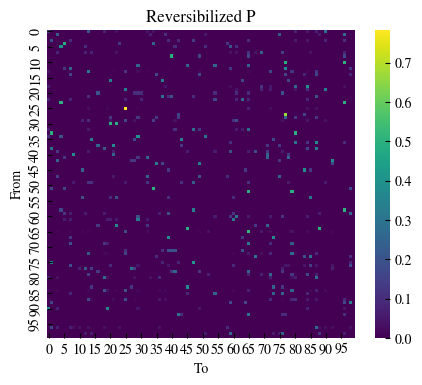

In [14]:
P_sym = emb.reversibilized_matrix()

fig, ax = plt.subplots(figsize=(5, 4))
plot_transition_matrix(P_sym, title="Reversibilized P", ax=ax)
